In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import re
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve

In [7]:
file = r"C:\Users\pengk\Downloads\CleanedTweetsNew.csv"
df = pd.read_csv(file)
df.head()  # Display first few rows

,Unnamed: 0,sentiment,text,mentions,hashtags,urls,exclamations,emoticons,ellipsis,processed_text
0,0,0,"- awww, that's a bummer. you shoulda got da...",1,0,1,0,1,0,"- awww , that's bummer . shoulda got david car..."
1,1,0,is upset that he can't update his facebook by ...,0,0,0,1,0,1,is upset can't update facebook texting ... mig...
2,2,0,i dived many times for the ball. managed to s...,1,0,0,0,0,0,dived many time ball . managed save 50 % rest ...
3,3,0,my whole body feels itchy and like its on fire,0,0,0,0,0,0,whole body feel itchy like fire
4,4,0,"no, it's not behaving at all. i'm mad. why am...",1,0,0,0,0,0,"no , not behaving . mad . ? can't see ."


In [9]:
def odd_char(text):
    letters_only = re.sub(r'[^A-Za-z]', '', text)
    return len(text)-len(letters_only) #length of text- english letters
df['odd_count'] = df['text'].apply(lambda x: odd_char(str(x)))
print(df['odd_count'])

0        25
1        27
2        22
3        10
4        29
         ..
99995    14
99996    23
99997    11
99998    29
99999    22
Name: odd_count, Length: 100000, dtype: int64


In [11]:
xvals=df[['mentions', 'hashtags', 'urls', 'exclamations', 'emoticons', 'ellipsis', 'odd_count']]
yvals=df['sentiment']

xtrain, xtest, ytrain, ytest=train_test_split(xvals, yvals, test_size=0.25, random_state=0)

std_x=StandardScaler()
xtrain=std_x.fit_transform(xtrain)
xtest=std_x.transform(xtest)

classifier=LogisticRegression() 
classifier.fit(xtrain, ytrain)
y_pred=classifier.predict(xtest)

cm=confusion_matrix(ytest,y_pred)
print(cm)

print("Accuracy:", accuracy_score(ytest, y_pred))

[[7729 4732]
 [5067 7472]]
Accuracy: 0.60804


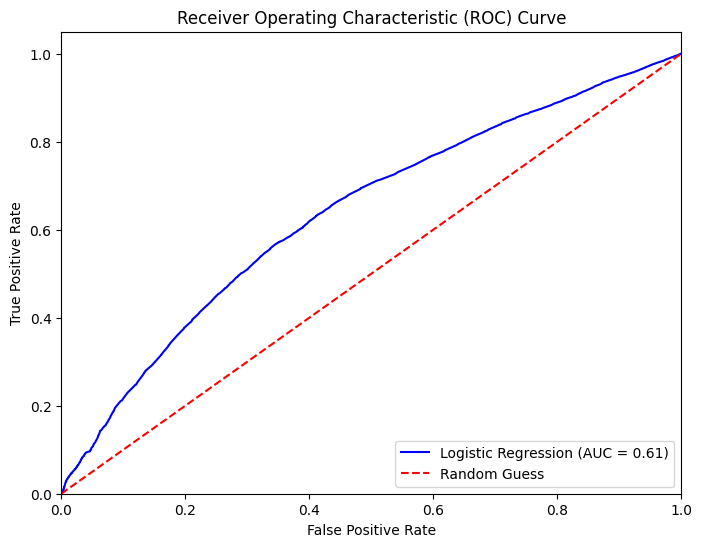

In [12]:

logit_roc_auc = roc_auc_score(ytest, classifier.predict(xtest))

# getting the roc curve for fpr and tpr
fpr, tpr, thresholds = roc_curve(ytest, classifier.predict_proba(xtest)[:, 1])

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (AUC = %0.2f)' % logit_roc_auc, color='blue')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.show()